In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

In [4]:
header = '/mnt/e/MAG/mag-2021-01-05/advanced/'
fields_infos = 'FieldsOfStudy.txt'
fos_infos = pd.read_csv(header+fields_infos, header=None, sep='\t')[[0, 1, 2]]
fos_infos.columns = ['field_id', 'rank', 'normalized_name']

In [5]:
fields_mean = '''philosophy (21.068)
sociology (22.177)
history (22.406)
political science (24.719)
art (26.496)
business (29.660)
economics (30.021)
population (34.081)
mathematics (34.169)
psychology (43.658)
engineering (46.300)
computer science (47.405)
geography (56.792)
environmental science (58.489)
chemistry (63.759)
materials science (63.823)
physics (68.416)
biology (71.278)
geology (76.280)
medicine (91.420)'''.split('\n')
fields_mean = [fos.replace(')','').split(' (') for fos in fields_mean]
fields_input = [a for a,b in fields_mean]
mean = [float(b) for a,b in fields_mean]
fos_sorted_COLABS_AV = np.asarray(fields_input)

In [6]:
fos_infos_map = dict()
for f,m in zip(fields_input, mean):
    fos_infos_map[f] = {'average\nnumber of colabs' : m/np.max(mean)}

In [7]:
SUFFIX = 2020

WS = json.load(open('results/ws_10a_full_%d.json' % SUFFIX))
WP = json.load(open('results/wp_10a_full_%d.json' % SUFFIX))
FOS = json.load(open('results/fos_10a_full_%d.json' % SUFFIX))

WS = np.asarray(WS)
WP = np.asarray(WP)
FOS = np.asarray(FOS)
unique = np.unique(FOS)

def fos_sort(max_ws, fos):
    values = []
    fs = []
    count = []
    for field in unique:
        group = max_ws[fos == field]
        median = np.percentile(group, 50)
        fs.append(field)
        values.append(median)
        count.append(len(group))
    values = np.asarray(values)
    fs = np.asarray(fs)
    count = np.asarray(count)
    idxs = np.argsort(values)
    values = values[idxs]
    fs = fs[idxs]
    count = count[idxs]
    
    return fs, values

fos_sorted, ws_vals = fos_sort(WS, FOS)
fos_sorted_WS = [fos_infos[fos_infos['field_id'] == field].iloc[0, -1] for field in fos_sorted]

fos_sorted, wp_vals = fos_sort(WP, FOS)
fos_sorted_WP = [fos_infos[fos_infos['field_id'] == field].iloc[0, -1] for field in fos_sorted]

In [8]:
max_v = np.max(ws_vals)
for f,v in zip(fos_sorted_WS, ws_vals):
    fos_infos_map[f]['cits top colab\ninfluence'] = v/max_v

max_v = np.max(wp_vals)
for f,v in zip(fos_sorted_WP, wp_vals):
    fos_infos_map[f]['papers top colab\ninfluence'] = v/max_v

In [9]:
fos_infos_pd = pd.DataFrame.from_dict(fos_infos_map, orient='index')
fos_infos_pd.reset_index(inplace=True)
fos_infos_pd

,index,average\nnumber of colabs,cits top colab\ninfluence,papers top colab\ninfluence
0,philosophy,0.230453,0.339318,0.153659
1,sociology,0.242584,0.410541,0.225000
2,history,0.245089,0.271837,0.123529
3,political science,0.270389,0.442706,0.244186
4,art,0.289827,0.308885,0.123529
5,business,0.324437,0.729998,0.472500
6,economics,0.328385,0.627406,0.394737
7,population,0.372796,0.619392,0.430769
8,mathematics,0.373758,0.645626,0.480000
9,psychology,0.477554,0.771290,0.566667


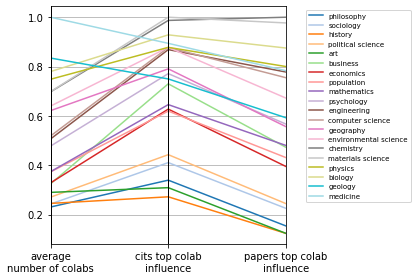

In [13]:
pd.plotting.parallel_coordinates(
    fos_infos_pd, 'index', colormap='tab20')
plt.legend(bbox_to_anchor=(1.07, 1), loc='upper left', fontsize=7)
plt.tight_layout()
plt.savefig('parallel_rank_metrics.pdf')

In [80]:
fos_infos_pd.columns

Index(['authors_colabs_average', 'ws', 'wp'], dtype='object')